In [11]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os 
plt.rcParams['image.cmap'] = 'gist_earth'


In [12]:
os.chdir('..') # move to parent directory in order to load module
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

(1, 8, 256, 256, 1)


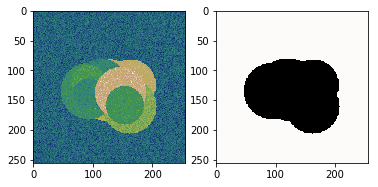

In [14]:
# generate sample image stack (1,8,256,256,1)<- NDHWC format
nx = 256
ny = 256
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20, depth_3d=8) 
x_test, y_test = generator(1)
print(x_test.shape)
plt.subplot(121)
plt.imshow(x_test[0,0,...,0])
plt.subplot(122)
plt.imshow(y_test[0,0,...,0])

In [15]:
net = unet.Unet3D(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)
prediction = net.predict("./unet_trained/model.cpkt", x_test)

2018-02-23 23:04:55,331 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



2018-02-23 23:04:56,870 From C:\Users\Marvin\PycharmProjects\tf_unet\tf_unet\unet.py:382: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-02-23 23:04:57,704 From C:\Users\Marvin\PycharmProjects\tf_unet\tf_unet\layers.py:78: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
2018-02-23 23:04:59,121 Removing 'C:\Users\Marvin\PycharmProjects\prediction'
2018-02-23 23:04:59,121 Removing 'C:\Users\Marvin\PycharmProjects\unet_trained'
2018-02-23 23:04:59,121 Allocating 'C:\Users\Marvin\PycharmProjects\prediction'
2018-02-23 23:04:59,134 Allocating 'C:\Users\Marvin\PycharmProjects\unet_trained'


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,0,...,0], aspect="auto")
ax[1].imshow(y_test[0,0,...,1], aspect="auto")
mask = prediction[0,0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")